In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools as fc

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from bs4 import Comment

# This does not work currently for:

- Rookies
- Retired Players
- Players with no stat category (i.e null 3p%)
- Players who will be free agents this upcoming summer

In [3]:
url = "https://www.basketball-reference.com/players/j/jamesle01.html"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'html.parser')

In [5]:
import re
title = str(soup.title)[7:]
match = re.match(r'.* S', title).group(0)
match = match[:-2]
print(match)

LeBron James


In [6]:
webpage_links = soup.find_all('tr', {'id': re.compile(r'per.game.*')})

In [7]:
import re
list_rows = []
labels = []
for row in webpage_links:
    cells = row.find_all('td')
    years = row.find('a')
    str_years = str(years)
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    clean3 = (re.sub(clean, '',str_years))
    
    print(type(clean2))
    list_rows.append([clean3 +"," + clean2])
    print(clean2)

<class 'str'>
[19, CLE, NBA, SG, 79, 79, 39.5, 7.9, 18.9, .417, 0.8, 2.7, .290, 7.1, 16.1, .438, .438, 4.4, 5.8, .754, 1.3, 4.2, 5.5, 5.9, 1.6, 0.7, 3.5, 1.9, 20.9]
<class 'str'>
[20, CLE, NBA, SF, 80, 80, 42.4, 9.9, 21.1, .472, 1.4, 3.9, .351, 8.6, 17.2, .499, .504, 6.0, 8.0, .750, 1.4, 6.0, 7.4, 7.2, 2.2, 0.7, 3.3, 1.8, 27.2]
<class 'str'>
[21, CLE, NBA, SF, 79, 79, 42.5, 11.1, 23.1, .480, 1.6, 4.8, .335, 9.5, 18.3, .518, .515, 7.6, 10.3, .738, 0.9, 6.1, 7.0, 6.6, 1.6, 0.8, 3.3, 2.3, 31.4]
<class 'str'>
[22, CLE, NBA, SF, 78, 78, 40.9, 9.9, 20.8, .476, 1.3, 4.0, .319, 8.6, 16.8, .513, .507, 6.3, 9.0, .698, 1.1, 5.7, 6.7, 6.0, 1.6, 0.7, 3.2, 2.2, 27.3]
<class 'str'>
[23, CLE, NBA, SF, 75, 74, 40.4, 10.6, 21.9, .484, 1.5, 4.8, .315, 9.1, 17.1, .531, .518, 7.3, 10.3, .712, 1.8, 6.1, 7.9, 7.2, 1.8, 1.1, 3.4, 2.2, 30.0]
<class 'str'>
[24, CLE, NBA, SF, 81, 81, 37.7, 9.7, 19.9, .489, 1.6, 4.7, .344, 8.1, 15.2, .535, .530, 7.3, 9.4, .780, 1.3, 6.3, 7.6, 7.2, 1.7, 1.1, 3.0, 1.7, 28.4]
<class

labels = webpage_links[0].find_all('td', {'data-stat': re.compile(r'.*')})
all_header = []
str_labels = str(labels)
cleantext2 = BeautifulSoup(str_labels, "lxml").get()
print(cleantext2)

In [8]:
labels = [['Season', 'Age', 'Team', 'League', 'Position', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Name']]
labels_df = pd.DataFrame(labels)
labels_df.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Season,Age,Team,League,Position,GP,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name


In [9]:
df = pd.DataFrame(list_rows)
df1 = df[0].str.split(',', expand=True)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2003-04,[19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9]
1,2004-05,[20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2]
2,2005-06,[21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4]
3,2006-07,[22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3]
4,2007-08,[23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0]


In [10]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2003-04,[19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9]
1,2004-05,[20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2]
2,2005-06,[21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4]
3,2006-07,[22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3]
4,2007-08,[23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0]


# Salary Info


In [11]:
comments = soup.find_all(string=lambda text: isinstance(text, Comment))

In [42]:
salary_info = []
for c in comments:
    if  "salary" in c.extract():
        salary_info.append(c.extract())

In [43]:
len(salary_info)

2

In [44]:
contractsoup = BeautifulSoup(salary_info[1], 'html.parser')
rows = contractsoup.find_all('tr')

In [45]:
rows = contractsoup.find_all('tr')
rows

[<tr class="thead">
 <th aria-label="Team" class=" center" data-stat="Team">Team</th>
 <th aria-label="2019-20" class=" center" data-stat="2019-20">2019-20</th>
 <th aria-label="2020-21" class=" center" data-stat="2020-21">2020-21</th>
 <th aria-label="2021-22" class=" center" data-stat="2021-22">2021-22</th>
 </tr>, <tr>
 <td><a href="/contracts/LAL.html">Los Angeles Lakers</a></td>
 <td><span class="">$37,436,858</span></td>
 <td><span class="">$39,219,565</span></td>
 <td><span class="salary-pl">$41,002,273</span></td>
 </tr>]

In [46]:
cleaned_data = []
for elem in rows:
    newcells = elem.find_all('th')
    newcells2 = elem.find_all('td')
    newcells3 = [newcells + newcells2]
    str_newcells3 = str(newcells3)
    clean5 = re.compile('<.*?>')
    clean4 = (re.sub(clean5, '',str_newcells3))
    cleaned_data.append(clean4)
    
cleaned_data

['[[Team, 2019-20, 2020-21, 2021-22]]',
 '[[Los Angeles Lakers, $37,436,858, $39,219,565, $41,002,273]]']

In [47]:
contract_df = pd.DataFrame(cleaned_data)
contract_df = contract_df[0].str.split(', ', expand=True)
d = {'Season': [contract_df[1][0]], 'Salary': [contract_df[1][1]]}
contract_df1 = pd.DataFrame(d)
contract_df1

,Salary,Season
0,"$37,436,858",2019-20


In [18]:
soup2 = BeautifulSoup(salary_info[0], 'html.parser')

In [19]:
cells2 = soup2.find_all('tr')


In [20]:
cleaned_salary = []

for elem in cells2:
    newcells = elem.find_all('th')
    newcells2 = elem.find_all('td')
    newcells3 = [newcells + newcells2]
    str_newcells3 = str(newcells3)
    clean5 = re.compile('<.*?>')
    clean4 = (re.sub(clean5, '',str_newcells3))
    cleaned_salary.append(clean4)

In [21]:
salary_df = pd.DataFrame(cleaned_salary)[0].str.split(', ', expand=True)
salary_df = salary_df.drop([1, 2], axis=1)
salary_df[0] = salary_df[0].str.strip('[[')
salary_df[3] = salary_df[3].str.strip(']]')
salary_df = salary_df.rename(columns=salary_df.iloc[0].str.strip())
salary_df = salary_df[salary_df.Salary != 'Salary']
salary_df = salary_df[salary_df.Season != 'Career']
salary_df


,Season,Salary
1,2003-04,"$4,018,920"
2,2004-05,"$4,320,360"
3,2005-06,"$4,621,800"
4,2006-07,"$5,828,090"
5,2007-08,"$13,041,250"
6,2008-09,"$14,410,581"
7,2009-10,"$15,779,912"
8,2010-11,"$14,500,000"
9,2011-12,"$16,022,500"
10,2012-13,"$17,545,000"


In [22]:
total_salary_df = salary_df.append(contract_df1)
total_salary_df.head()

,Salary,Season
1,"$4,018,920",2003-04
2,"$4,320,360",2004-05
3,"$4,621,800",2005-06
4,"$5,828,090",2006-07
5,"$13,041,250",2007-08


# Finally, Data!

In [23]:
data_frames = [labels_df, df1]
df4 = pd.concat(data_frames)
df4.head()



,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Season,Age,Team,League,Position,GP,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name
0,2003-04,[19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9],NaN
1,2004-05,[20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2],NaN
2,2005-06,[21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4],NaN
3,2006-07,[22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3],NaN


In [24]:
df5 = df4.rename(columns=df4.iloc[0].str.strip())

#(df5.shape[0])


In [25]:
df6 = df5[df5.MP != 'MP']

df6['Age'] = (df6['Age'].str.strip('['))
df6['PTS'] = (df6['PTS'].str.strip(']'))
df6['AST'] = df6['AST'].astype(float)

df7 = df6.astype(str)

In [26]:
df7.head()

,Season,Age,Team,League,Position,GP,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,nan
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,nan
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,nan
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,nan
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,nan


In [27]:
df8 = df7.apply(fc.partial(pd.to_numeric, errors='ignore'))

df8.head()

,Season,Age,Team,League,Position,GP,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,nan
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,nan
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,nan
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,nan
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,nan


In [28]:
df8 = pd.merge(df8, total_salary_df, on=['Season'])
names = [match] * (df8.shape[0])
df8['Name'] = names
df8.head()

,Season,Age,Team,League,Position,GP,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Name,Salary
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,LeBron James,"$4,018,920"
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,LeBron James,"$4,320,360"
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,LeBron James,"$4,621,800"
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,LeBron James,"$5,828,090"
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,LeBron James,"$13,041,250"


# Delete non-used dataframes to preserve RAM.


# del df, df1, df4, df5, df6, df7

del data_frames

# Time to graph some stuff

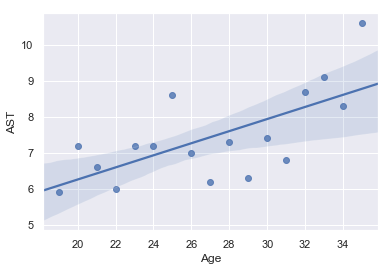

In [29]:
sns.regplot(x='Age', y='AST', data=df8);

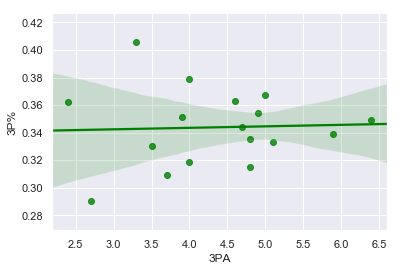

In [30]:
sns.regplot(x='3PA', y='3P%', data=df8, color="green")

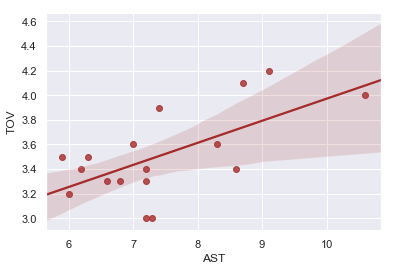

In [31]:
sns.regplot(x='AST', y='TOV', data=df8, color="brown")

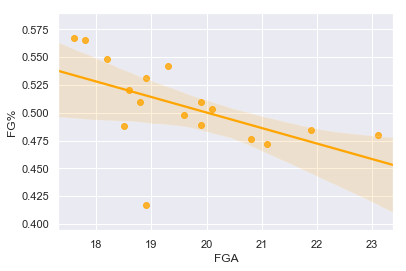

In [32]:
sns.regplot(x='FGA', y='FG%', data=df8, color="orange")